In [3]:
import pandas as pd
import numpy as np
import sklearn as sk

#boston_data ##python convention
#bostonData # camel convention
#bostonata

In [4]:
bostonData = pd.read_csv("train.csv")
bostonData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
x=bostonData.drop(["SalePrice"],axis=1)
y=bostonData['SalePrice']

# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=12121)

In [59]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1314, 80), (146, 80), (1314,), (146,))

In [60]:
bostonData.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Processing of Training set

In [61]:
#dividing dataset into categorical and numerical data 
bostonDataCategorical = x_train.select_dtypes(object)
bostonDataNumerical=x_train.select_dtypes(np.number)

In [62]:
bostonDataCategorical.isna().sum().head()

MSZoning          0
Street            0
Alley          1230
LotShape          0
LandContour       0
dtype: int64

In [63]:
bostonData.shape

(1460, 81)

In [64]:
#dropping the columns which is having more than 70% of null values
bostonDataCategorical.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)

C:\Users\balag\anaconda\envs\Test\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Imputation of Categorical Columns

In [65]:
#imputer is used to fill null values there are so many imputing processes,for time being we are using simple imputer
from sklearn.impute import SimpleImputer
sImputer = SimpleImputer(strategy="most_frequent")
sImputer

SimpleImputer(strategy='most_frequent')

In [66]:
sImputer.fit(bostonDataCategorical) #fit only understands the data

SimpleImputer(strategy='most_frequent')

In [67]:
temp=sImputer.transform(bostonDataCategorical)
bostonDataCategoricalNARemoved = pd.DataFrame(temp,columns=bostonDataCategorical.columns)
bostonDataCategoricalNARemoved.isna().sum().head()

MSZoning       0
Street         0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

# Imputation of Numerical Columns

In [68]:
#imputer for numerical
sImputerNumerical= SimpleImputer(strategy="mean")

In [69]:
sImputerNumerical.fit(bostonDataNumerical)

SimpleImputer()

In [70]:
temp=sImputerNumerical.transform(bostonDataNumerical)
bostonDataNumericalNARemoved = pd.DataFrame(temp,columns=bostonDataNumerical.columns)

In [71]:
bostonDataNumericalNARemoved.isna().sum().head()

Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
dtype: int64

# Data Processing

In [72]:
#data processing
from sklearn.preprocessing import LabelEncoder #labelencoder is used to convert categorical data into numerical data 
le=LabelEncoder()

In [73]:
bostonDataCategoricalEncoded=bostonDataCategoricalNARemoved.apply(le.fit_transform)

In [74]:
from sklearn.preprocessing import StandardScaler #standard scaler is used to convert large range numerical data into small
ss=StandardScaler() #range numerical data

In [75]:
ss.fit(bostonDataNumericalNARemoved)

StandardScaler()

In [76]:
temp=ss.transform(bostonDataNumericalNARemoved)
bostonDataNumericalEncoded=pd.DataFrame(temp,columns=bostonDataNumericalNARemoved.columns)

In [77]:
bostonDataNumericalEncoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.519334,2.437913,-1.354319,-0.644964,-0.068181,-0.523667,1.267013,1.184239,-0.150313,-0.984225,...,0.271460,-0.747456,2.868186,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,-0.123179,0.897073
1,-0.318226,-0.871525,0.791999,-0.245268,-0.802524,0.366499,0.135183,-0.467352,-0.575832,-0.984225,...,-0.897024,-0.747456,-0.696898,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,-0.860568,0.147706
2,-0.405881,-0.162360,-0.460020,0.056556,-1.536867,0.366499,-1.695719,-1.681756,-0.575832,0.407734,...,0.469349,-0.747456,0.019166,1.573392,-0.113719,-0.27116,-0.066914,-0.091066,0.982905,-1.351027
3,0.172167,-0.635137,-1.354319,-0.560948,-1.536867,1.256666,-1.828875,0.261291,-0.575832,-0.553745,...,-0.143163,-0.747456,-0.696898,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,0.245516,-0.601661
4,-0.917596,-0.871525,-0.460020,-0.204695,-1.536867,-1.413834,-0.697045,-1.681756,-0.575832,-0.984225,...,-0.831061,1.245670,-0.696898,0.028499,-0.113719,-0.27116,-0.066914,-0.091066,0.982905,0.897073


In [78]:
bostonDataFinal=pd.concat([bostonDataCategoricalEncoded,bostonDataNumericalEncoded],axis=1)

# Build the model

In [79]:
from sklearn.linear_model import LinearRegression,SGDRegressor
lr=LinearRegression()
sgdR=SGDRegressor()

In [80]:
lr.fit(bostonDataFinal.to_numpy(),y_train.to_numpy())

LinearRegression()

In [81]:
sgdR.fit(bostonDataFinal.to_numpy(),y_train.to_numpy())

SGDRegressor()

In [82]:
#lasso #ridge
from sklearn.linear_model import Lasso,Ridge,ElasticNet
lasso=Lasso(alpha=0.5)
ridge=Ridge(alpha=0.5)
eNet=ElasticNet(l1_ratio=0.3)

In [83]:
lasso.fit(bostonDataFinal.to_numpy(),y_train.to_numpy())

Lasso(alpha=0.5)

In [84]:
ridge.fit(bostonDataFinal.to_numpy(),y_train.to_numpy())

Ridge(alpha=0.5)

In [85]:
eNet.fit(bostonDataFinal.to_numpy(),y_train.to_numpy())

ElasticNet(l1_ratio=0.3)

# Preparation of Test set

In [86]:
bostonDataCategorical = x_test.select_dtypes(object)
bostonDataNumerical=x_test.select_dtypes(np.number)

In [87]:
bostonDataCategorical.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)

C:\Users\balag\anaconda\envs\Test\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Imputation of Categorical Columns

In [88]:
temp=sImputer.transform(bostonDataCategorical)
bostonDataCategoricalNARemoved = pd.DataFrame(temp,columns=bostonDataCategorical.columns)
bostonDataCategoricalNARemoved.isna().sum().head()

MSZoning       0
Street         0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

# Imputation of Numerical Columns

In [89]:
temp=sImputerNumerical.transform(bostonDataNumerical)
bostonDataNumericalNARemoved = pd.DataFrame(temp,columns=bostonDataNumerical.columns)

# Data Processing

In [90]:
bostonDataCategoricalEncoded=bostonDataCategoricalNARemoved.apply(le.fit_transform)

In [91]:
temp=ss.transform(bostonDataNumericalNARemoved)
bostonDataNumericalEncoded=pd.DataFrame(temp,columns=bostonDataNumericalNARemoved.columns)

In [92]:
bostonDataNumericalEncoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.152393,-0.871525,-0.951884,1.031896,1.400505,-0.523667,1.133857,1.038510,-0.575832,2.776468,...,3.126707,0.783265,3.370954,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,-1.966652,-1.351027
1,1.695466,-0.871525,-0.325875,-0.194799,0.666162,-0.523667,1.100568,0.941358,0.017654,-0.984225,...,0.733200,0.783265,0.217226,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,1.720294,-0.601661
2,0.077405,-0.635137,-0.460020,-0.352045,-0.802524,-0.523667,-1.562562,-1.681756,-0.575832,-0.099228,...,-0.143163,-0.747456,-0.696898,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,1.351600,0.897073
3,-1.038417,0.074029,2.222878,0.508898,1.400505,-0.523667,1.167146,1.038510,-0.575832,-0.984225,...,1.011186,-0.747456,0.080108,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,0.245516,-1.351027
4,-0.486429,0.074029,2.670027,2.931711,2.869192,-0.523667,1.200435,1.135662,3.690547,3.954279,...,1.948800,0.910825,5.488675,-0.357724,-0.113719,-0.27116,-0.066914,-0.091066,1.351600,-0.601661


In [93]:
bostonDataTestFinal = pd.concat([bostonDataCategoricalEncoded, bostonDataNumericalEncoded],
                            axis=1)

# Predictions

In [94]:
predictions_lr = lr.predict(bostonDataTestFinal)
predictions_sgd = sgdR.predict(bostonDataTestFinal)

C:\Users\balag\anaconda\envs\Test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

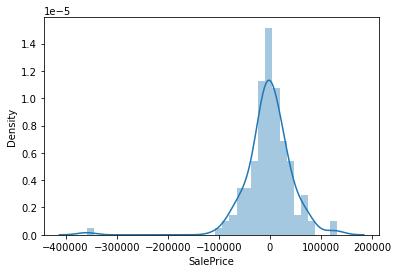

In [95]:
# distplot for Linear model
sns.distplot(y_test-predictions_lr)

C:\Users\balag\anaconda\envs\Test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

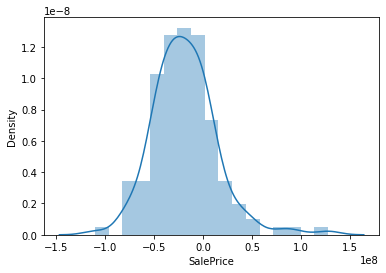

In [96]:
# distplot for SGD
sns.distplot(y_test-predictions_sgd)

In [97]:
import matplotlib.pyplot as plt

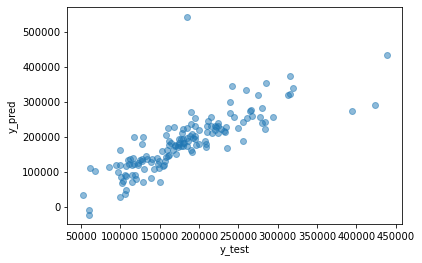

In [99]:
# scatter plot for y_test and y_pred (linear regression)
plt.scatter(y_test, predictions_lr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

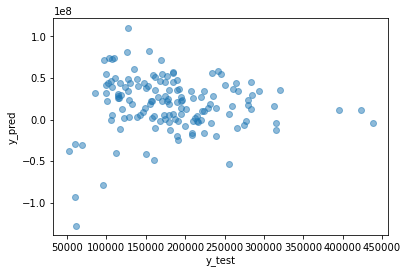

In [100]:
# scatter plot for y_test and y_pred (linear regression)
plt.scatter(y_test, predictions_sgd, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Metrics

## Linear Regression

In [106]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [110]:
print('MAE:', mean_absolute_error(y_test, predictions_lr))
print('MSE:', mean_squared_error(y_test, predictions_lr))

MAE: 30021.532151185816
MSE: 2286974561.7024803


In [102]:
print('RMSE:',np.sqrt(mean_squared_error(predictions_lr, y_test)))

RMSE: 47822.322838842534


In [111]:
print("r2_score:",r2_score(predictions_lr, y_test))

r2_score: 0.6585624824726118


In [127]:
# adjusted r2 score
r2 = r2_score(y_test,predictions_lr)
n = len(x_test)
k = x_test.shape[1]
adj_r2_score = 1 - (((1- r2)*(n-1)) / (n - k - 1))
print("adj_r2_score  value is : ",adj_r2_score)

adj_r2_score  value is :  -0.08613833206202237


## SGD

In [112]:
print('MAE:', mean_absolute_error(y_test, predictions_sgd))
print('MSE:', mean_squared_error(y_test, predictions_sgd))

MAE: 29679565.15379753
MSE: 1421505025968937.2


In [113]:
print('RMSE:',np.sqrt(mean_squared_error(predictions_sgd, y_test)))

RMSE: 37702851.695447885


In [114]:
print("r2_score:",r2_score(predictions_sgd, y_test))

r2_score: -0.328458272373116


In [126]:
# adjusted r2 score
r2 = r2_score(y_test,predictions_sgd)
n = len(x_test)
k = x_test.shape[1]
adj_r2_score = 1 - (((1- r2)*(n-1)) / (n - k - 1))
print("adj_r2_score  value is : ",adj_r2_score)

adj_r2_score  value is :  -675105.3714387482


# Lasso and Ridge

In [50]:
# this lasso and ridge are used to avoid Overfitting
predictions_lasso = lasso.predict(bostonDataTestFinal)
predictions_ridge = ridge.predict(bostonDataTestFinal)
predictions_eNet = eNet.predict(bostonDataTestFinal)

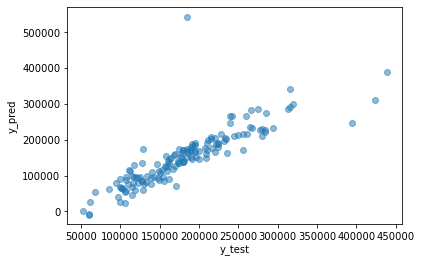

In [115]:
# scatter plot for lasso
plt.scatter(y_test,predictions_lasso,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

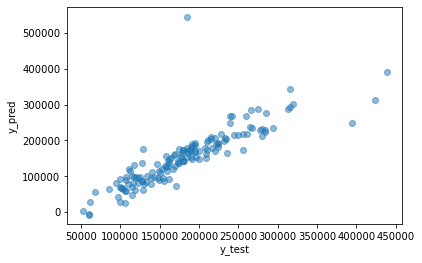

In [116]:
# scatter plot for Ridge
plt.scatter(y_test,predictions_ridge,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [120]:
# for lasso
print('MAE:', mean_absolute_error(y_test, predictions_lasso))
print('MSE:', mean_squared_error(y_test, predictions_lasso))

MAE: 37710.27547229668
MSE: 2647672262.4019785


In [118]:
print("RMSE for lasso:",np.sqrt(mean_squared_error(predictions_lasso, y_test)))

RMSE for lasso: 51455.5367516653


In [130]:
print("r2_score:",r2_score(predictions_lasso, y_test))

r2_score: 0.5715568357796375


In [124]:
# adjusted r2 score
r2 = r2_score(y_test,predictions_lasso)
n = len(x_test)
k = x_test.shape[1]
adj_r2_score = 1 - (((1- r2)*(n-1)) / (n - k - 1))
print("adj_r2_score  value is : ",adj_r2_score)

adj_r2_score  value is :  -0.2574422046878364


In [121]:
# for Ridge
print('MAE:', mean_absolute_error(y_test, predictions_ridge))
print('MSE:', mean_squared_error(y_test, predictions_ridge))

MAE: 36151.764512994785
MSE: 2535128863.26484


In [119]:
print("RMSE for Ridge:",np.sqrt(mean_squared_error(predictions_ridge, y_test)))

RMSE for Ridge: 50350.06319027654


In [129]:
print("r2_score:",r2_score(predictions_ridge, y_test))

r2_score: 0.5897673295540412


In [125]:
# adjusted r2 score
r2 = r2_score(y_test,predictions_ridge)
n = len(x_test)
k = x_test.shape[1]
adj_r2_score = 1 - (((1- r2)*(n-1)) / (n - k - 1))
print("adj_r2_score  value is : ",adj_r2_score)

adj_r2_score  value is :  -0.20399268151849914


In [53]:
np.sqrt(mean_squared_error(predictions_eNet, y_test))

35402.154477324024

# Correlation

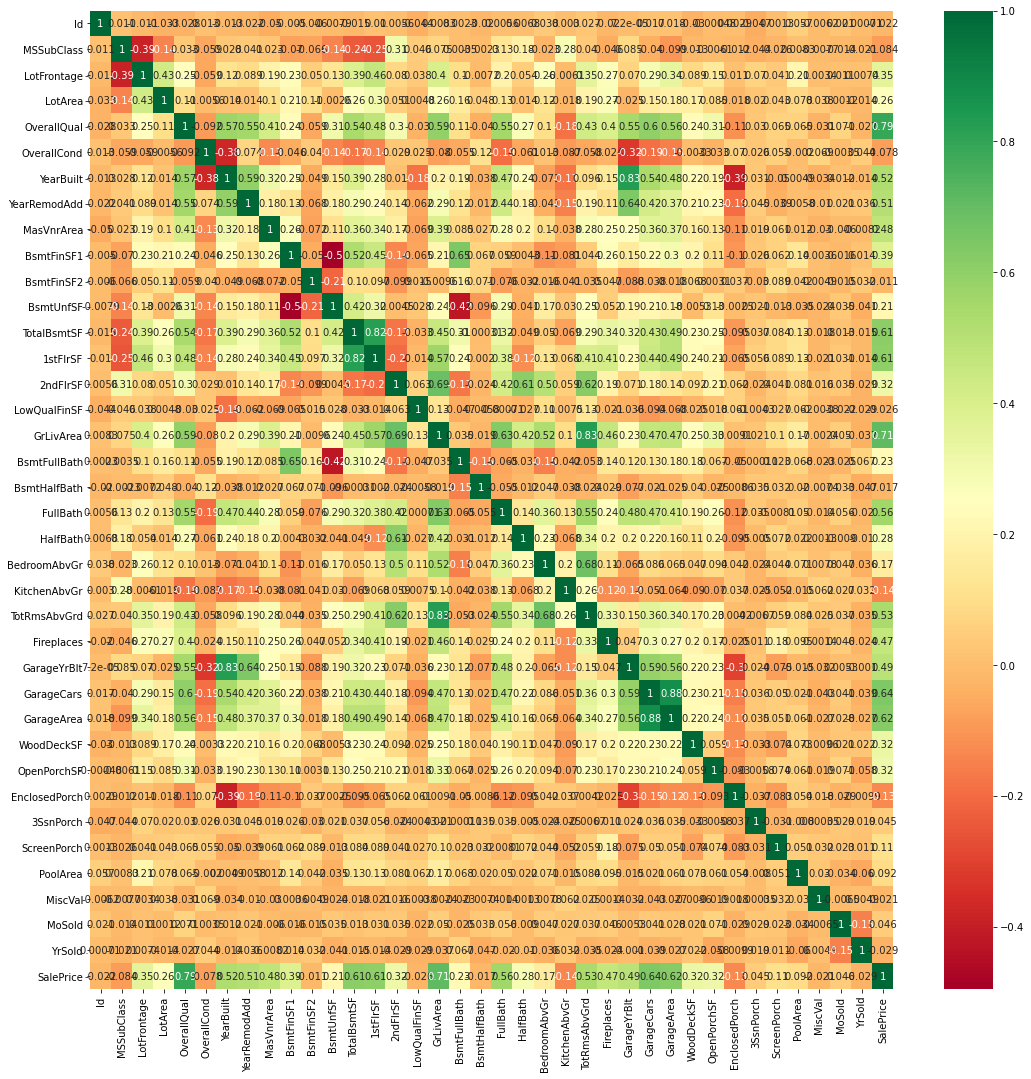

In [131]:
plt.figure(figsize=(18,18))
sns.heatmap(bostonData.corr(),annot=True,cmap="RdYlGn")
plt.show()